## important imports

In [51]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np

import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from LoadRealRunningJumping import *
from LoadSyntheticRunningJumping import *

from GANModels import *

from dataLoader import *

import torch.fft as fft

from EvaluationFunctions import DagharUniclassEvaluation

from sklearn.manifold import TSNE


## Evaluating daghar models

class name : run
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/training_model/Daghar-models/Run_5000_D_30/
dataset: Daghar
 
 Starting evaluation
Original Set:


return single class data and labels, class is run
data shape is (16260, 3, 1, 30)
label shape is (16260,)

 Synthetic Set:
Checkpoint epochs: 5
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99779 ± 0.00000', 'Frequency': '0.84821 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/run_30_5000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b


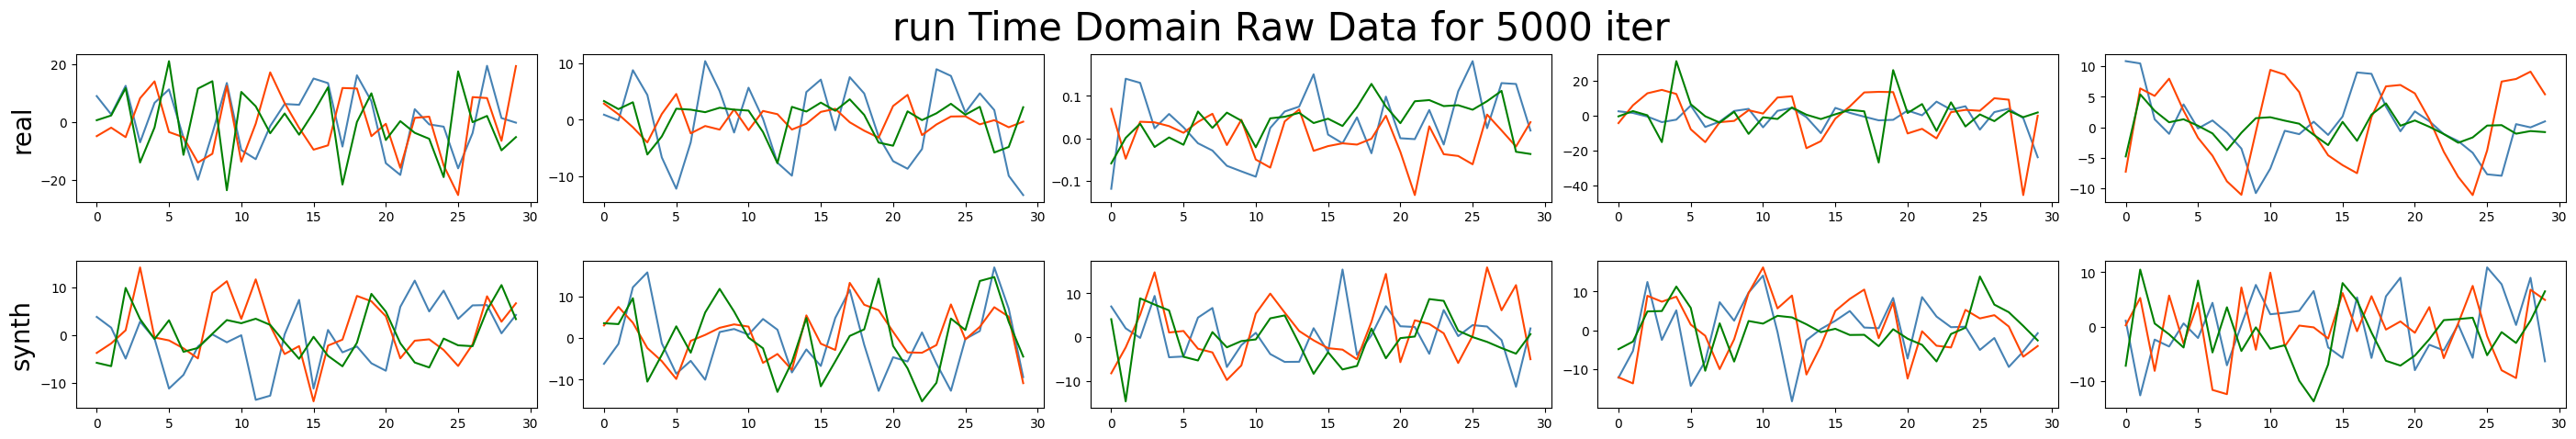

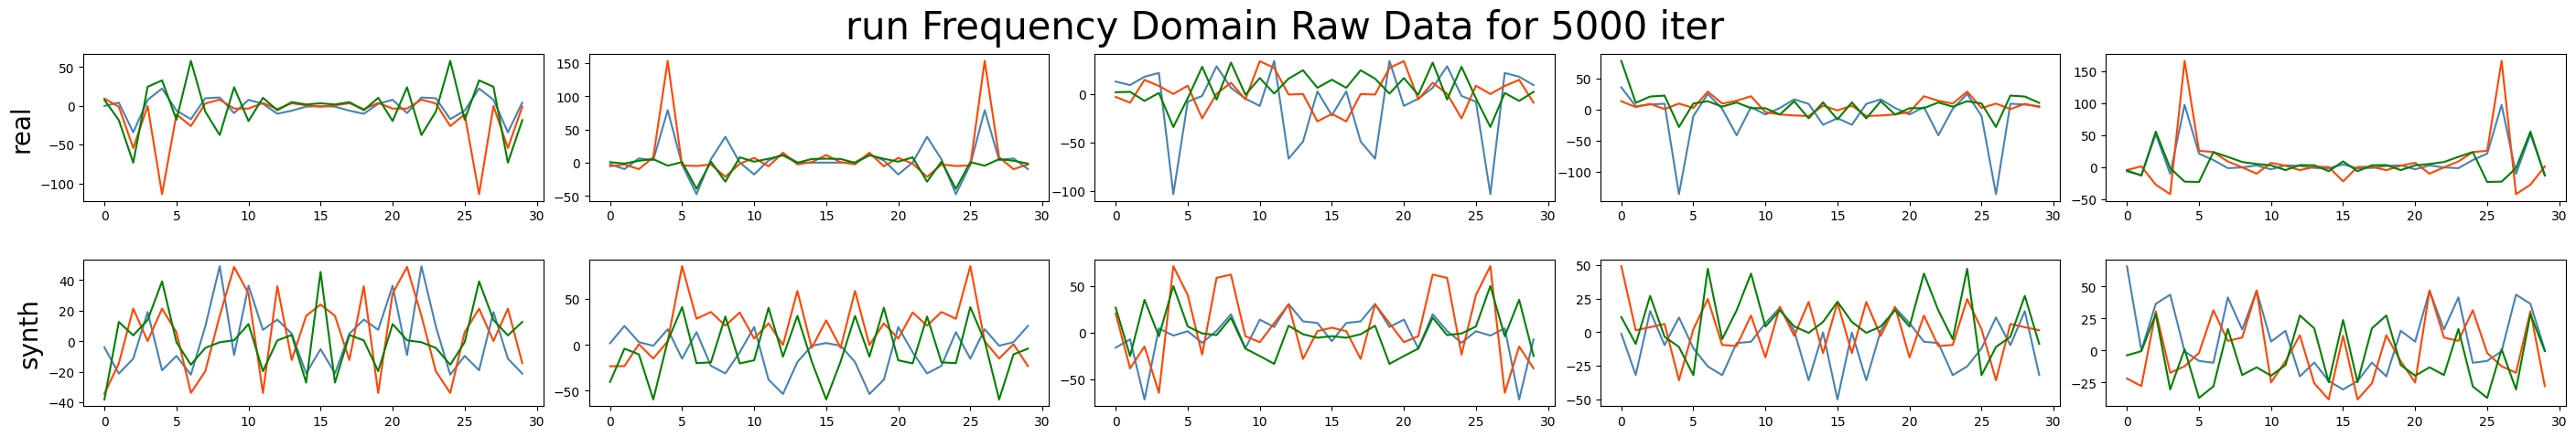

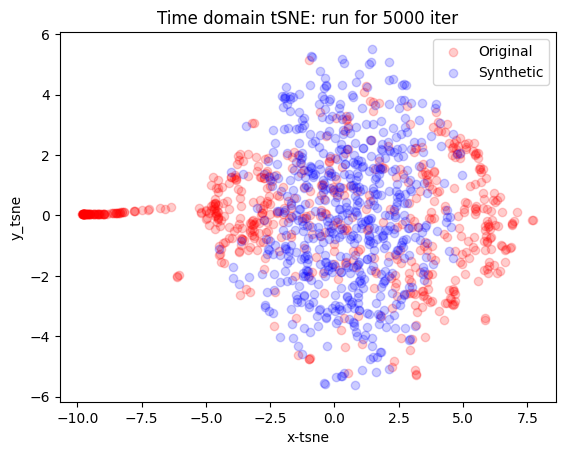

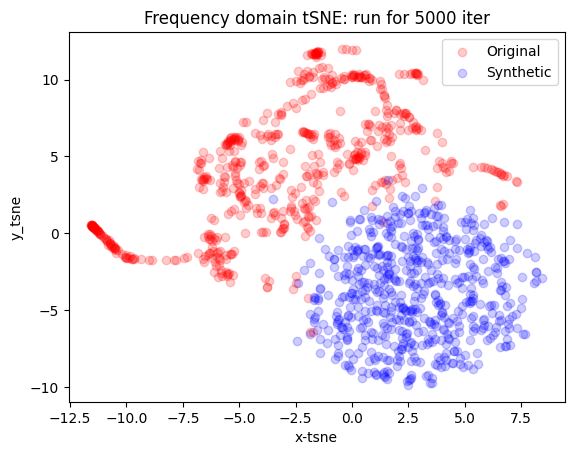

In [2]:
eval = DagharUniclassEvaluation(models_path='../pre-trained-models/training_model/Daghar-models/Run_5000_D_30/',
                                class_name='run',
                                seq_len=30,
                                show=True,
                                n=1)

In [3]:
def multiclass_TSNE_visualization(original, synthetic, classes, title = 't-SNE plot', random = None, show=True):
        '''

        Data original and synthetic is expected to be in shape (batch, timeframe, channel), for 
        example (600, 30, 3)

        '''
        n = len(original)
        l = len(original[0])

        idx = np.random.permutation(l)

        no, seq_len, dim = original[0].shape  
        
        for j in range(n):
            # Data preprocessing
            ori = np.transpose(original[j], (0, 2, 1))
            syn = np.transpose(synthetic[j], (0, 2, 1))

            ori = np.asarray(ori)
            syn = np.asarray(syn) 

            #For complex values
            ori = np.abs(ori[idx])
            syn = np.abs(syn[idx])

            for i in range(l):
               

                if (i == 0):
                    prep = np.reshape(np.mean(ori[0,:,:], 1), [1, seq_len])
                    prep_hat = np.reshape(np.mean(syn[0,:,:], 1), [1, seq_len])

                else:
                    prep = np.concatenate((prep, 
                                                np.reshape(np.mean(ori[i,:,:],1), [1, seq_len])))
                    prep_hat = np.concatenate((prep_hat, 
                                                np.reshape(np.mean(syn[i,:,:],1), [1, seq_len])))
                
            data_temp = np.concatenate((prep_data_final, prep, prep_hat), axis = 0)

            if prep_data_final:
                prep_data_final = np.concatenate((prep_data_final, data_temp), axis = 0)
            else:
                prep_data_final = data_temp

            print(prep_data_final.shape)

        # Do t-SNE Analysis together 
        # TSNE anlaysis
        tsne = TSNE(n_components = 2, verbose = 0, perplexity = 40, n_iter = 300)
        tsne_results = tsne.fit_transform(prep_data_final)
        #print(tsne_results.shape)
        # Plotting
        if not show:
            return tsne_results
        
        f, ax = plt.subplots(1)

        for k in range(n):
            plt.scatter(tsne_results[:l*(k+1),0], tsne_results[:l*(k+1),1], 
                        c = 'red', alpha = 0.2, label = f"{classes[k]} Original")
            
            plt.scatter(tsne_results[l*(n+1):l*(k+2),0], tsne_results[l*(n+1):l(k+2),1], 
                        c = 'blue', alpha = 0.2, label = f"{classes[k]} Synthetic")

        ax.legend()

        plt.title(title)
        plt.xlabel('x-tsne')
        plt.ylabel('y_tsne')
        plt.show()

        return tsne_results

In [4]:
import re

# Função para converter até o primeiro número
def convert_string(s):
    # Encontrar a parte da string antes do primeiro número
    match = re.match(r'([^\d]+)(\d+)', s)
    if match:
        # Extrair a parte antes e o número
        prefix = match.group(1).lower()  # Parte antes do número, convertida para minúsculas
        number = match.group(2)          # Primeiro número encontrado
        return f"{prefix}{number}"       # Retorna no formato desejado
    return s  # Retorna a string original se não houver números

models_path = '../pre-trained-models/daghar_50000_30_100/'
data_path = '../DAGHAR_GANs/'
directorys = os.listdir(models_path)
class_names = [s.split('_')[0].lower() for s in directorys]
first_parts = [convert_string(s) for s in directorys]

directorys, class_names, first_parts

(['upstairs_50000_D_30_2024_10_18_01_07_13',
  'sit_50000_D_30_2024_10_18_03_16_07',
  'stand_50000_D_30_2024_10_18_03_47_52',
  'run_50000_D_30_2024_10_18_01_39_30',
  'walk_50000_D_30_2024_10_18_02_11_49',
  'downstairs_50000_D_30_2024_10_18_02_43_48'],
 ['upstairs', 'sit', 'stand', 'run', 'walk', 'downstairs'],
 ['upstairs_50000',
  'sit_50000',
  'stand_50000',
  'run_50000',
  'walk_50000',
  'downstairs_50000'])

class name : upstairs
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/upstairs_50000_D_30_2024_10_18_01_07_13/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is upstairs
data shape is (12854, 3, 1, 30)
label shape is (12854,)

 Synthetic Set:
Checkpoint epochs: 63
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99921 ± 0.00018', 'Frequency': '0.76855 ± 0.00301'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/upstairs_30_50000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
class name : sit
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/sit_50000_D_30_2024_10_18_03_16_07/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is sit
data shape is (17228, 3, 1, 30)
label shape is (17228,)

 Synthetic Set:
Checkpoint epochs: 47
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99300 ± 0.00182', 'Frequency': '0.98550 ± 0.00164'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/sit_30_50000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
class name : stand
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/stand_50000_D_30_2024_10_18_03_47_52/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is stand
data shape is (17228, 3, 1, 30)
label shape is (17228,)

 Synthetic Set:
Checkpoint epochs: 47
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99709 ± 0.00107', 'Frequency': '0.98483 ± 0.00072'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/stand_30_50000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
class name : run
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/run_50000_D_30_2024_10_18_01_39_30/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is run
data shape is (16260, 3, 1, 30)
label shape is (16260,)

 Synthetic Set:
Checkpoint epochs: 50
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99863 ± 0.00041', 'Frequency': '0.78550 ± 0.00300'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/run_30_50000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
class name : walk
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/walk_50000_D_30_2024_10_18_02_11_49/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is walk
data shape is (17228, 3, 1, 30)
label shape is (17228,)

 Synthetic Set:
Checkpoint epochs: 47
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99888 ± 0.00039', 'Frequency': '0.78632 ± 0.00532'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/walk_30_50000/
a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
class name : downstairs
Data path is located in: ../DAGHAR_GANs/
Models path is located in: ../pre-trained-models/daghar_50000_30_100/downstairs_50000_D_30_2024_10_18_02_43_48/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is downstairs
data shape is (12854, 3, 1, 30)
label shape is (12854,)

 Synthetic Set:
Checkpoint epochs: 63
(600, 3, 1, 30)
(600, 1)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

{'Time': '0.99871 ± 0.00023', 'Frequency': '0.79860 ± 0.00303'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/downstairs_30_50000/


/workspaces/container-workspace/tts-gan/Notebooks/Evaluate.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig.suptitle(title, fontsize=30)


a


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


b
-----------------------------------------------------------------------------
{'upstairs_50000': {'Time': '0.99921 ± 0.00018', 'Frequency': '0.76855 ± 0.00301'}, 'sit_50000': {'Time': '0.99300 ± 0.00182', 'Frequency': '0.98550 ± 0.00164'}, 'stand_50000': {'Time': '0.99709 ± 0.00107', 'Frequency': '0.98483 ± 0.00072'}, 'run_50000': {'Time': '0.99863 ± 0.00041', 'Frequency': '0.78550 ± 0.00300'}, 'walk_50000': {'Time': '0.99888 ± 0.00039', 'Frequency': '0.78632 ± 0.00532'}, 'downstairs_50000': {'Time': '0.99871 ± 0.00023', 'Frequency': '0.79860 ± 0.00303'}}
6


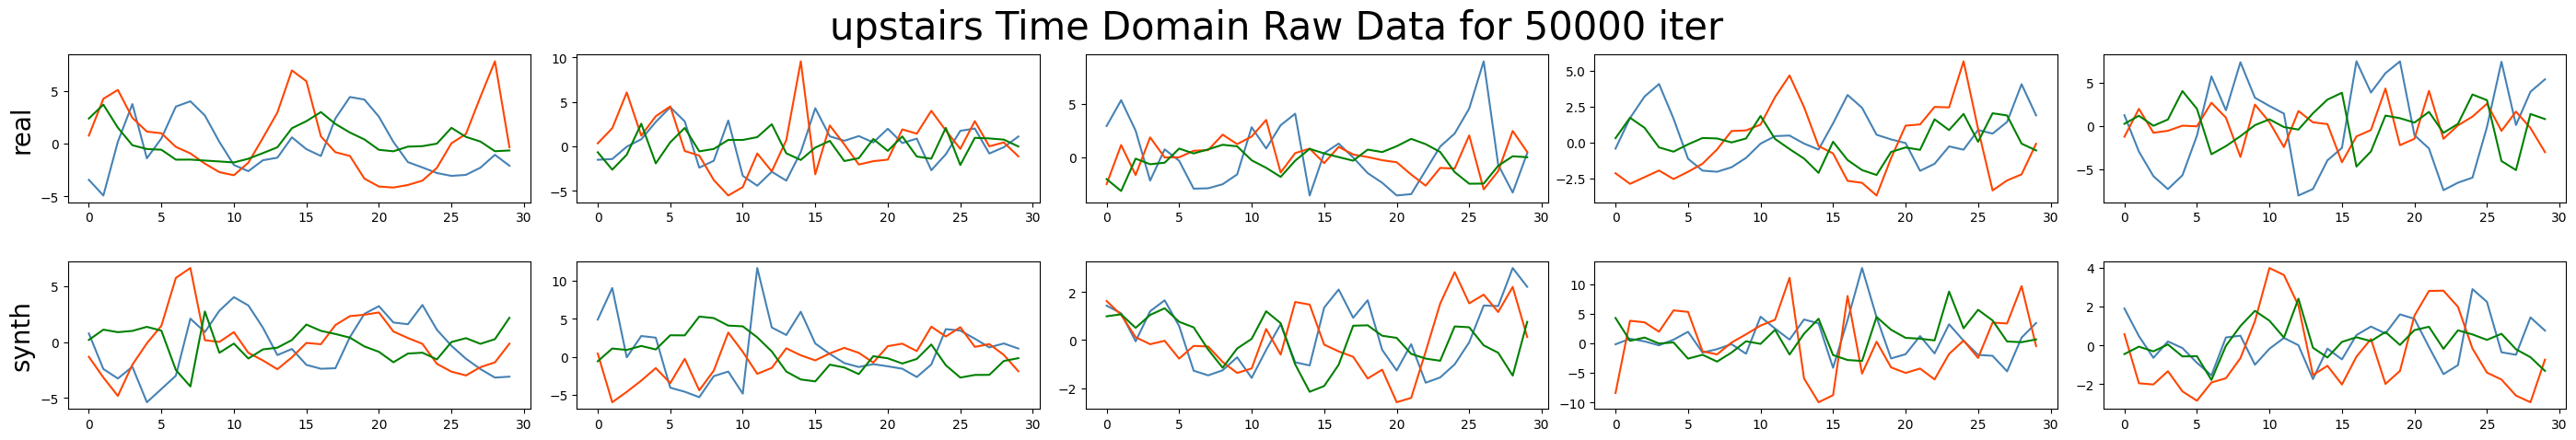

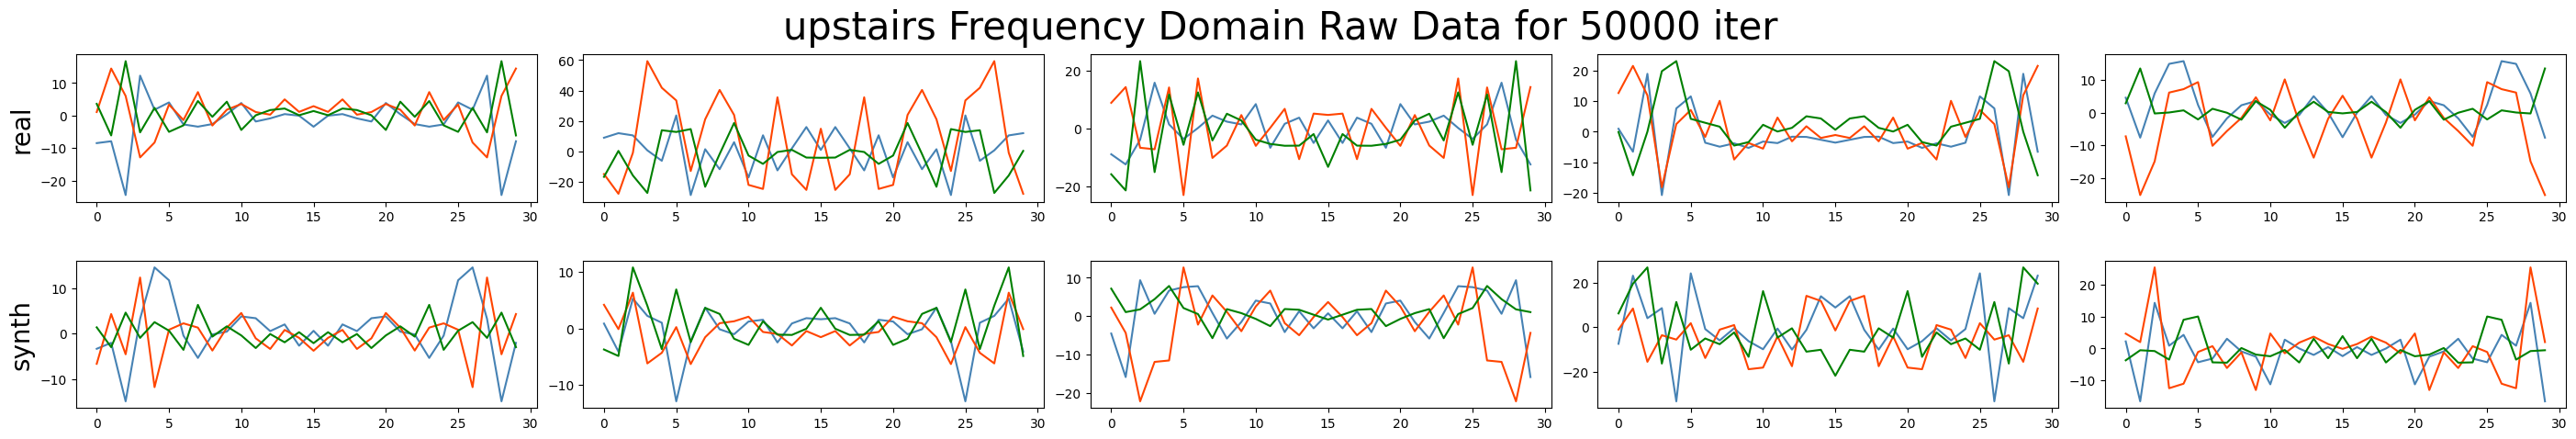

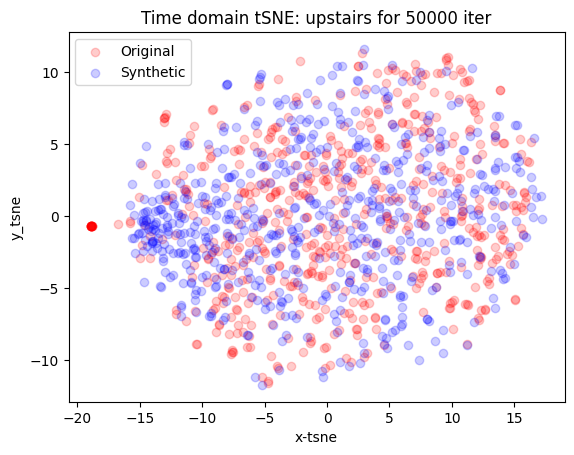

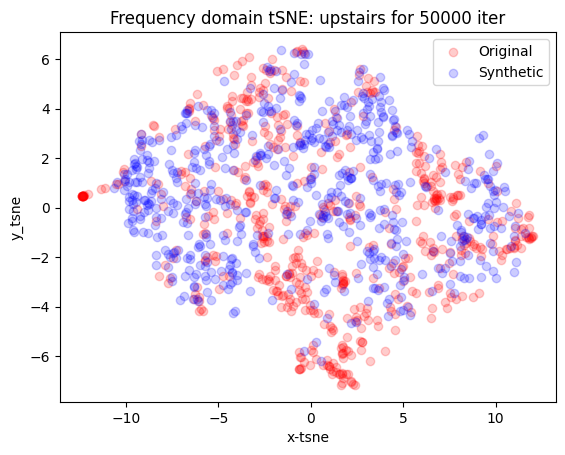

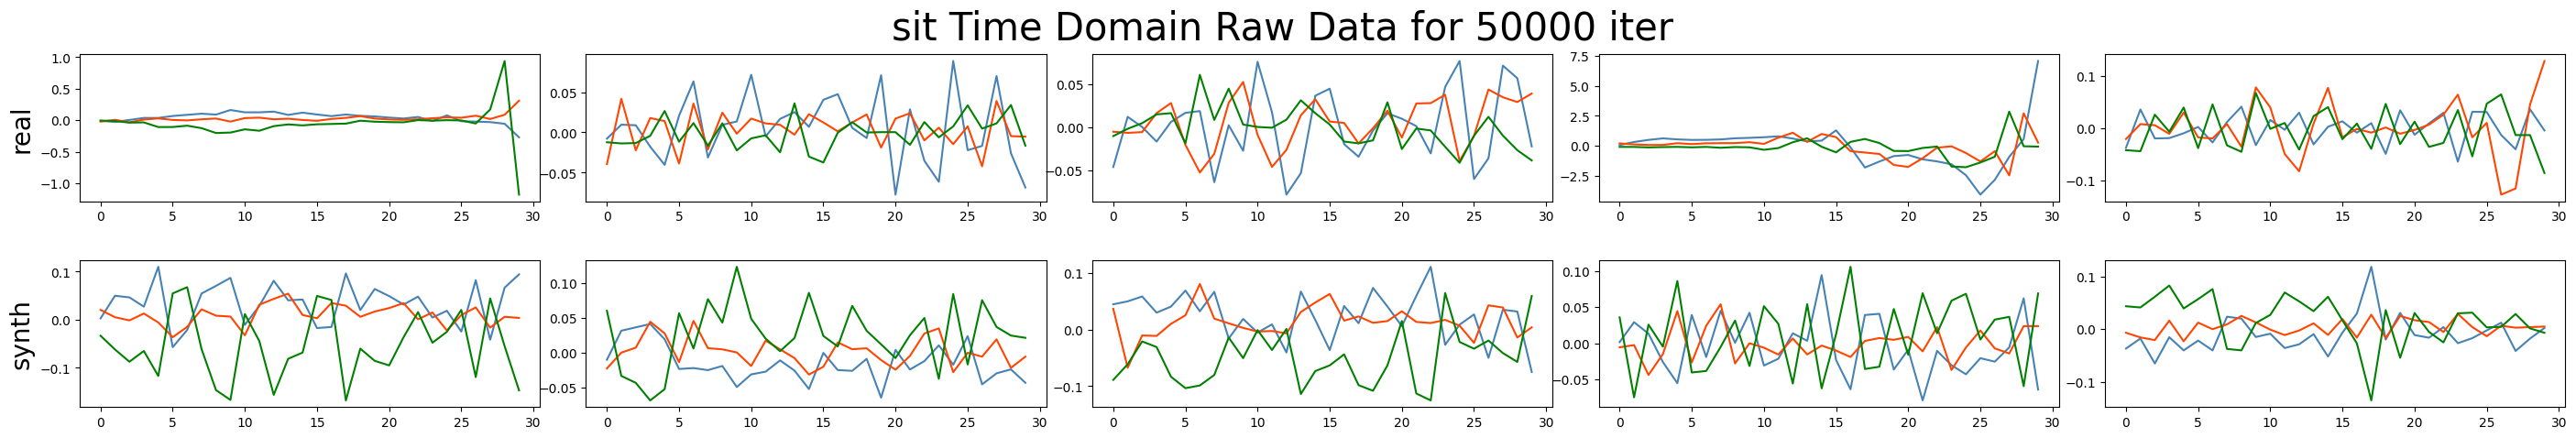

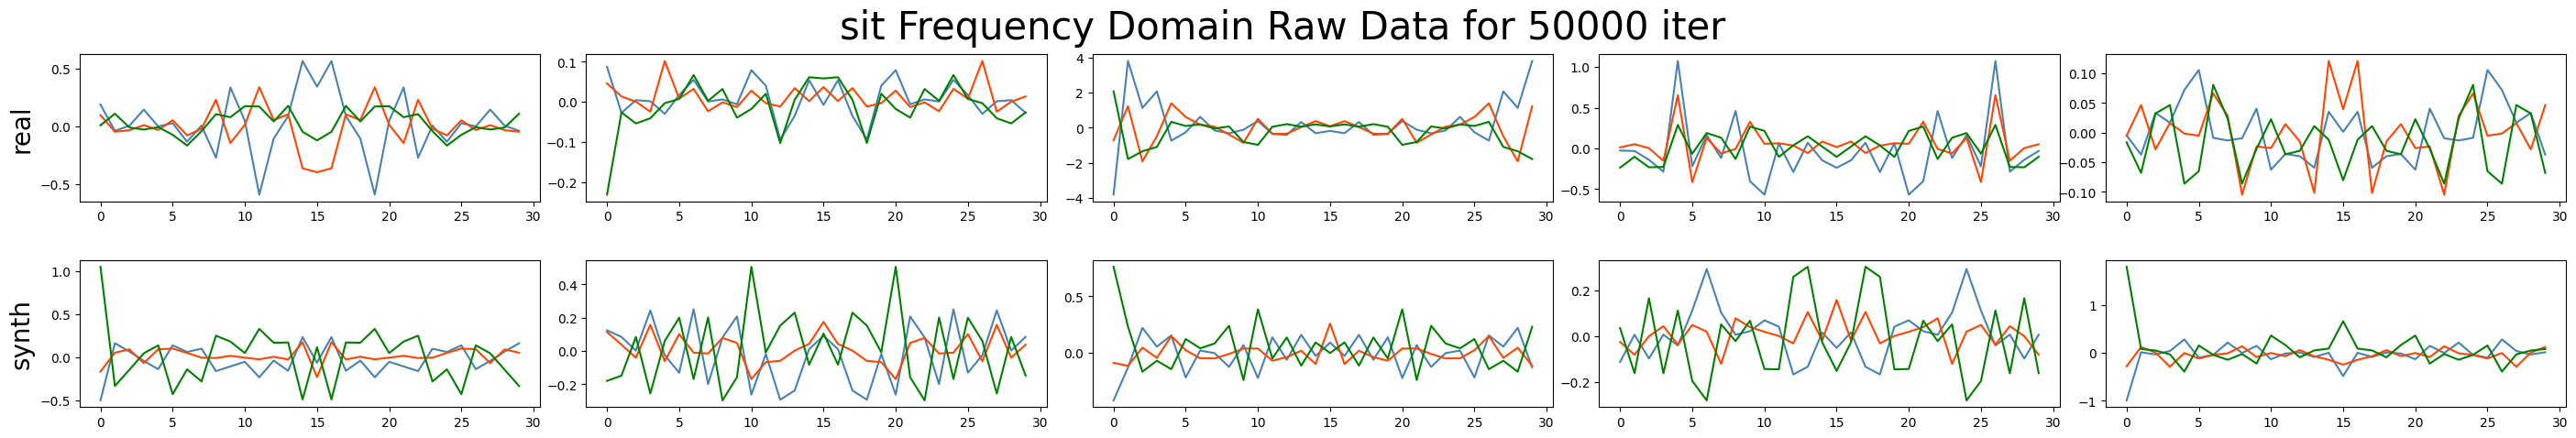

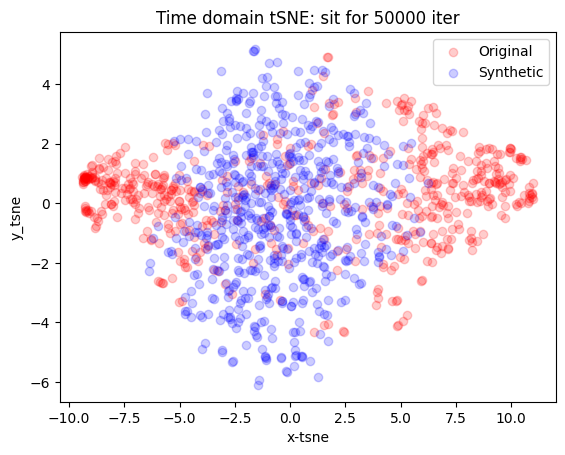

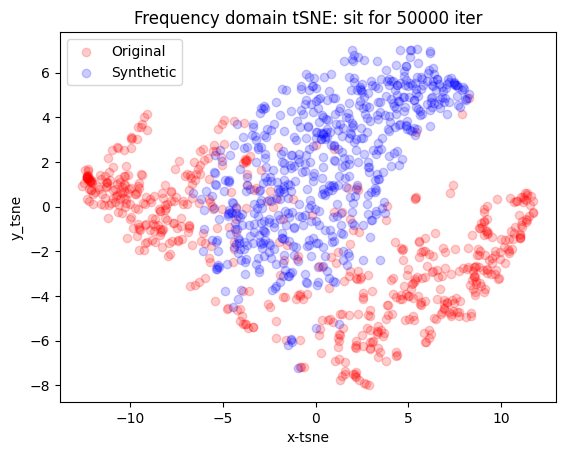

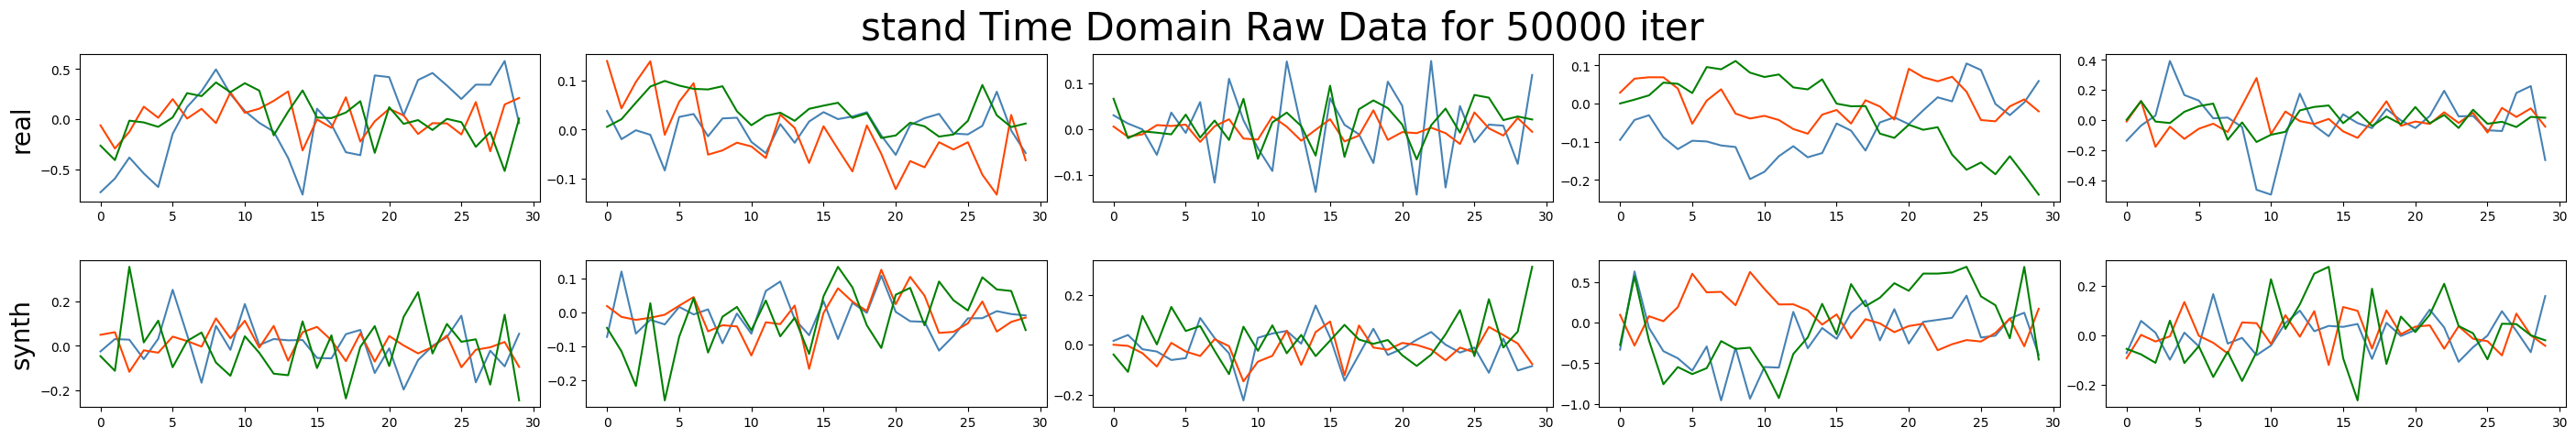

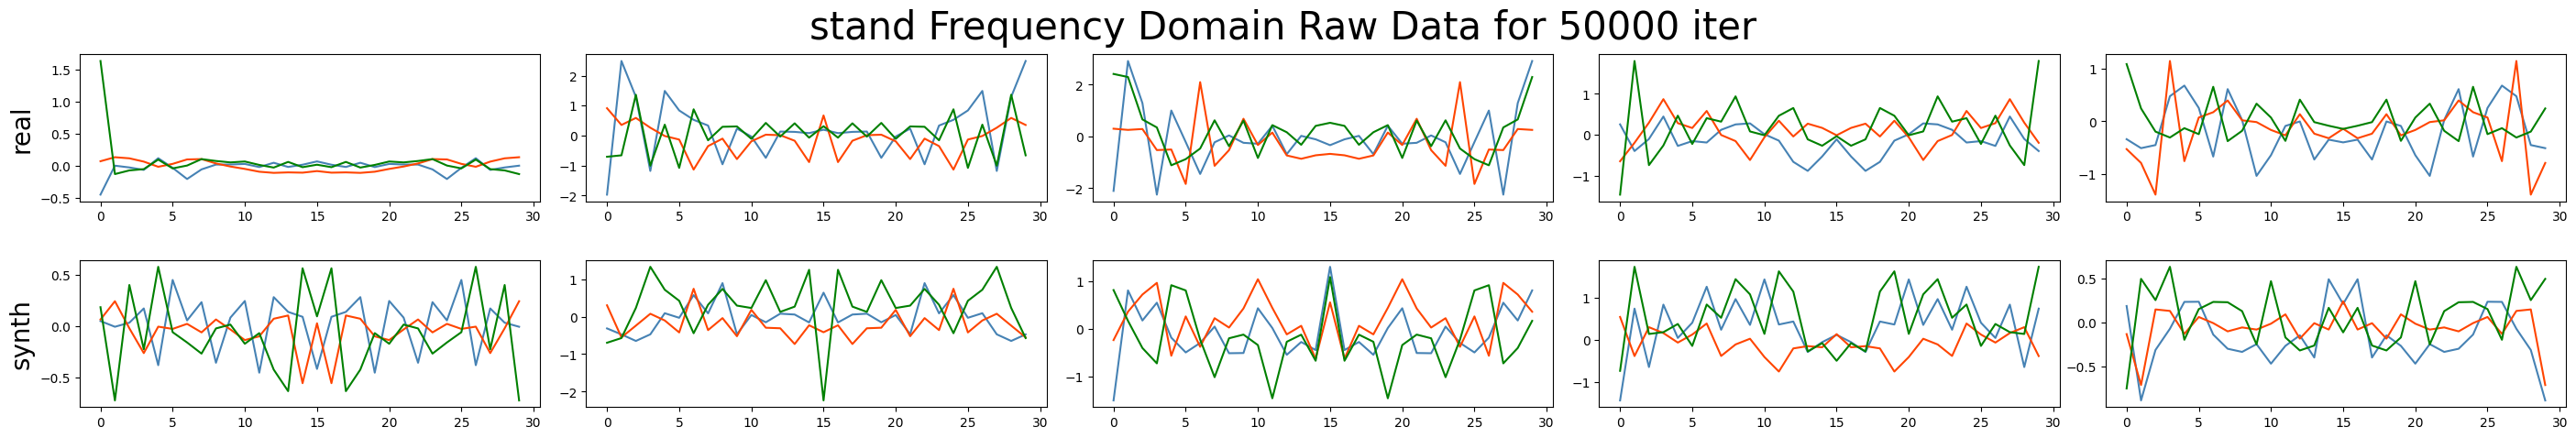

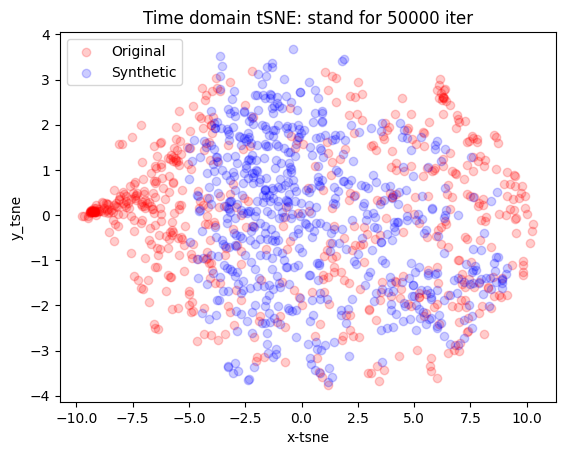

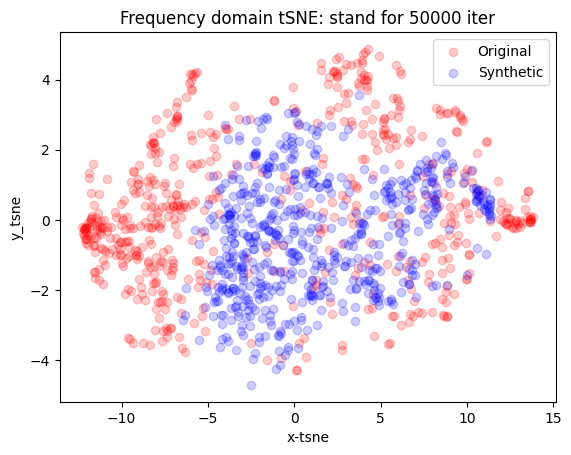

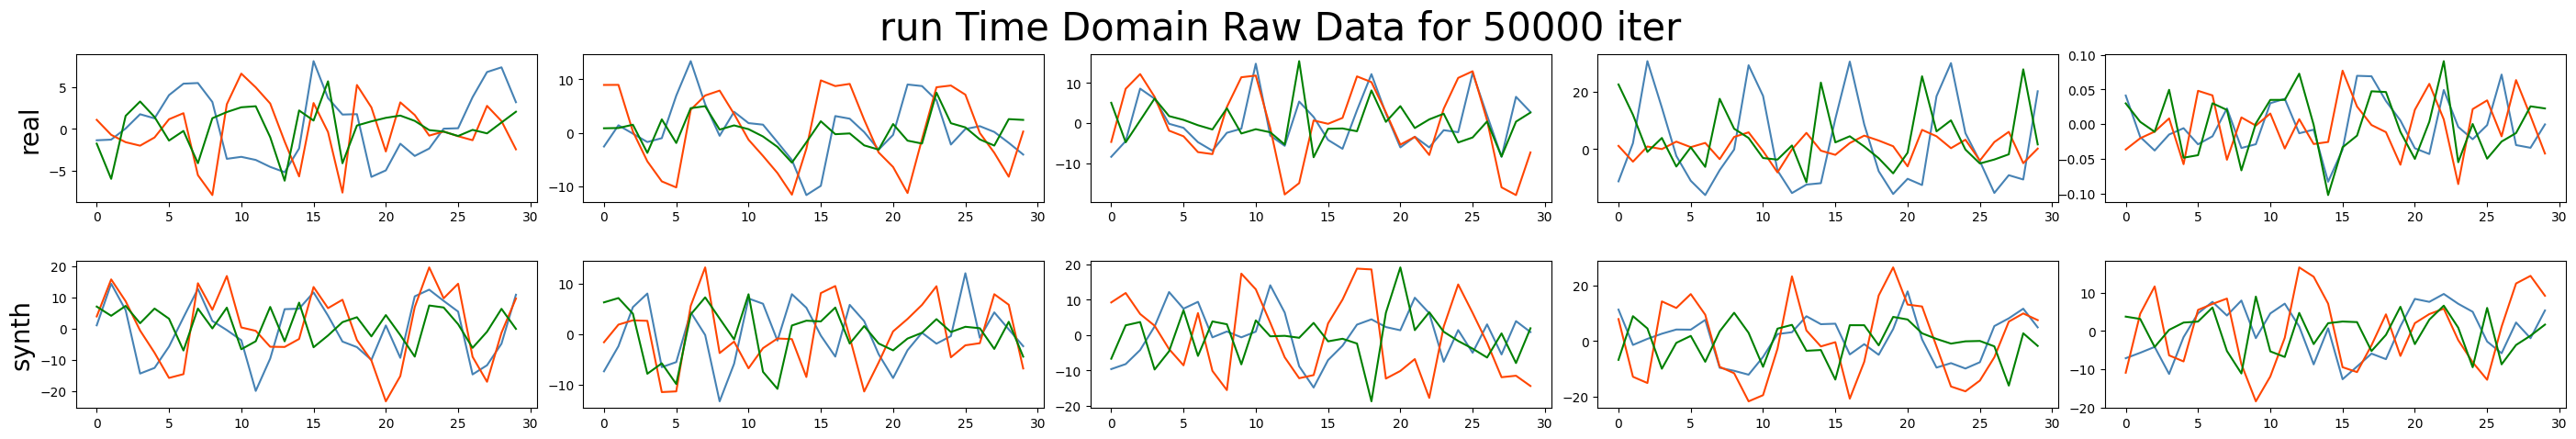

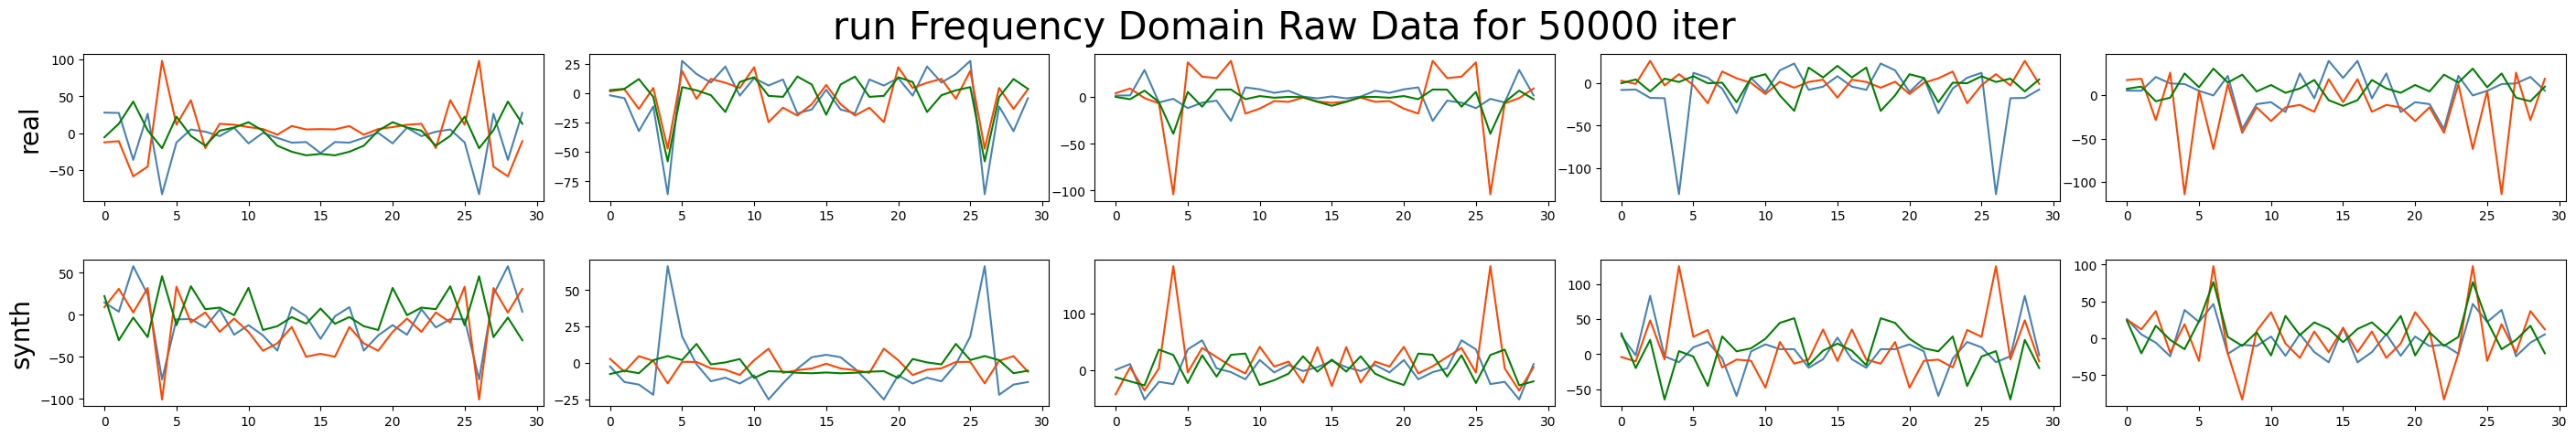

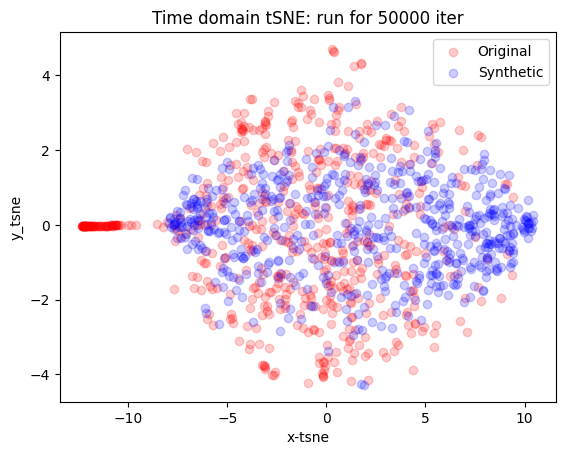

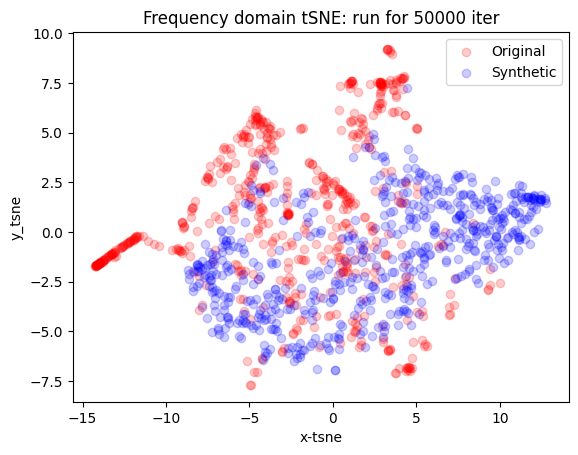

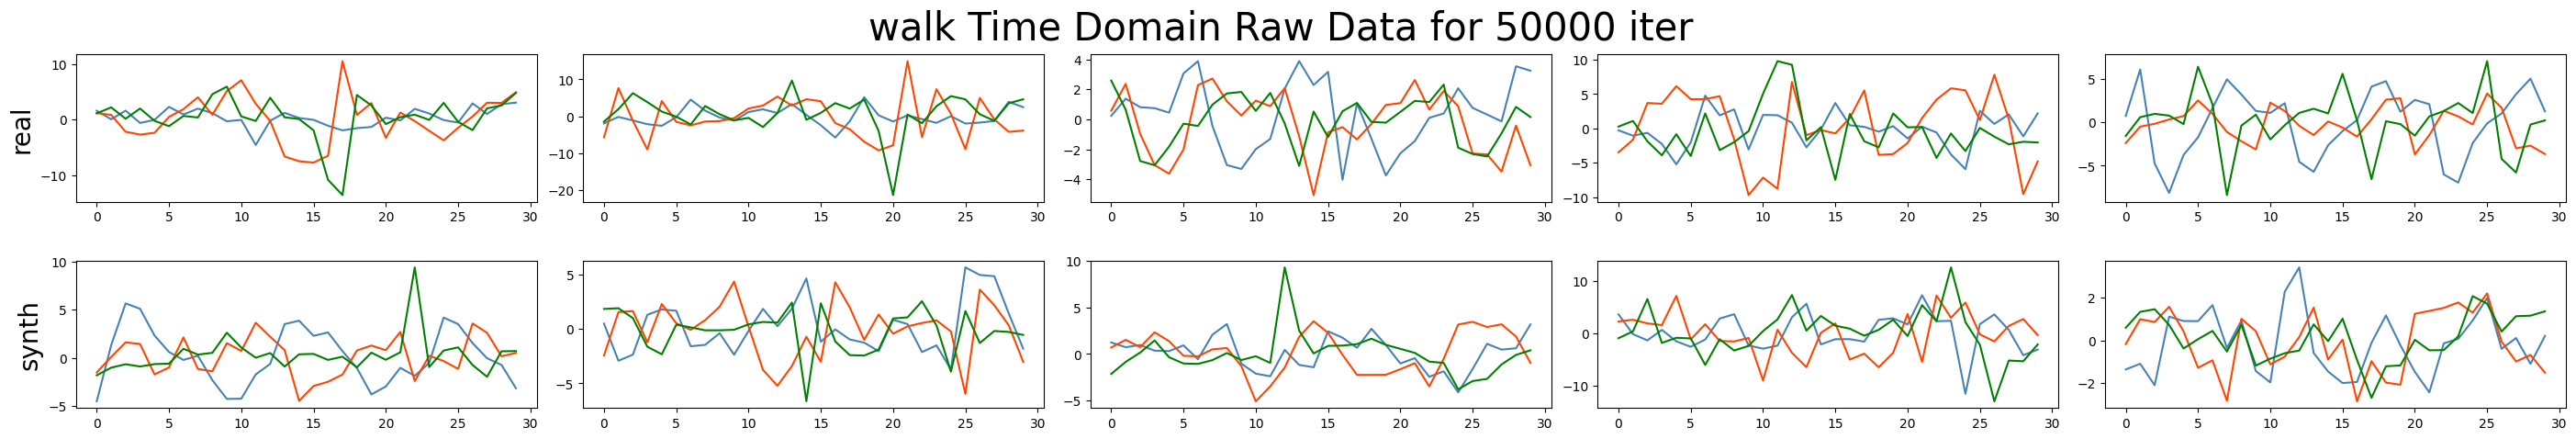

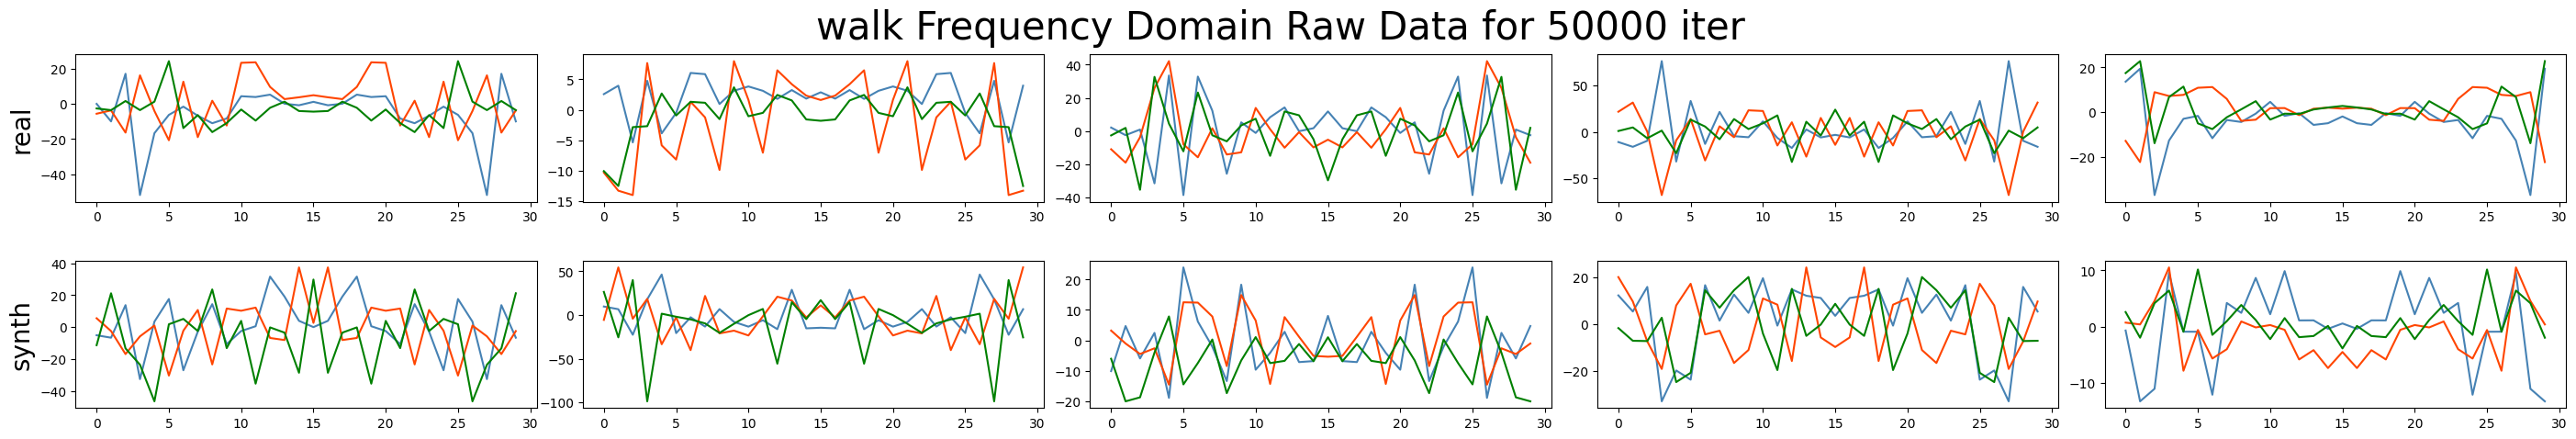

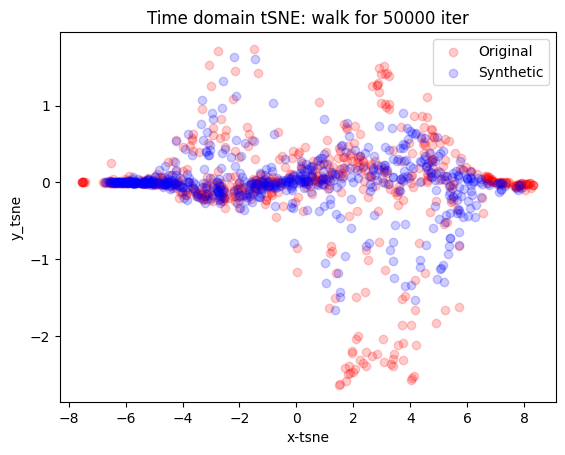

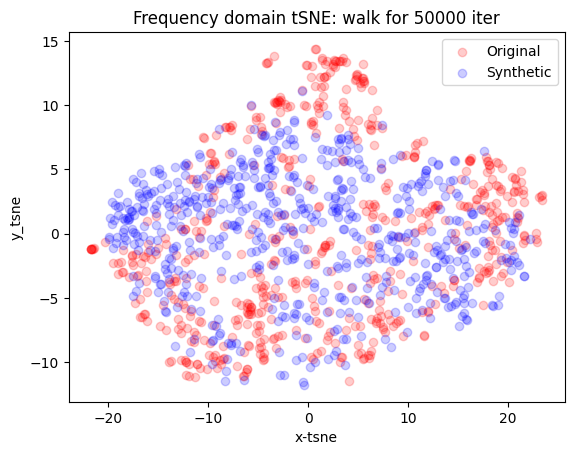

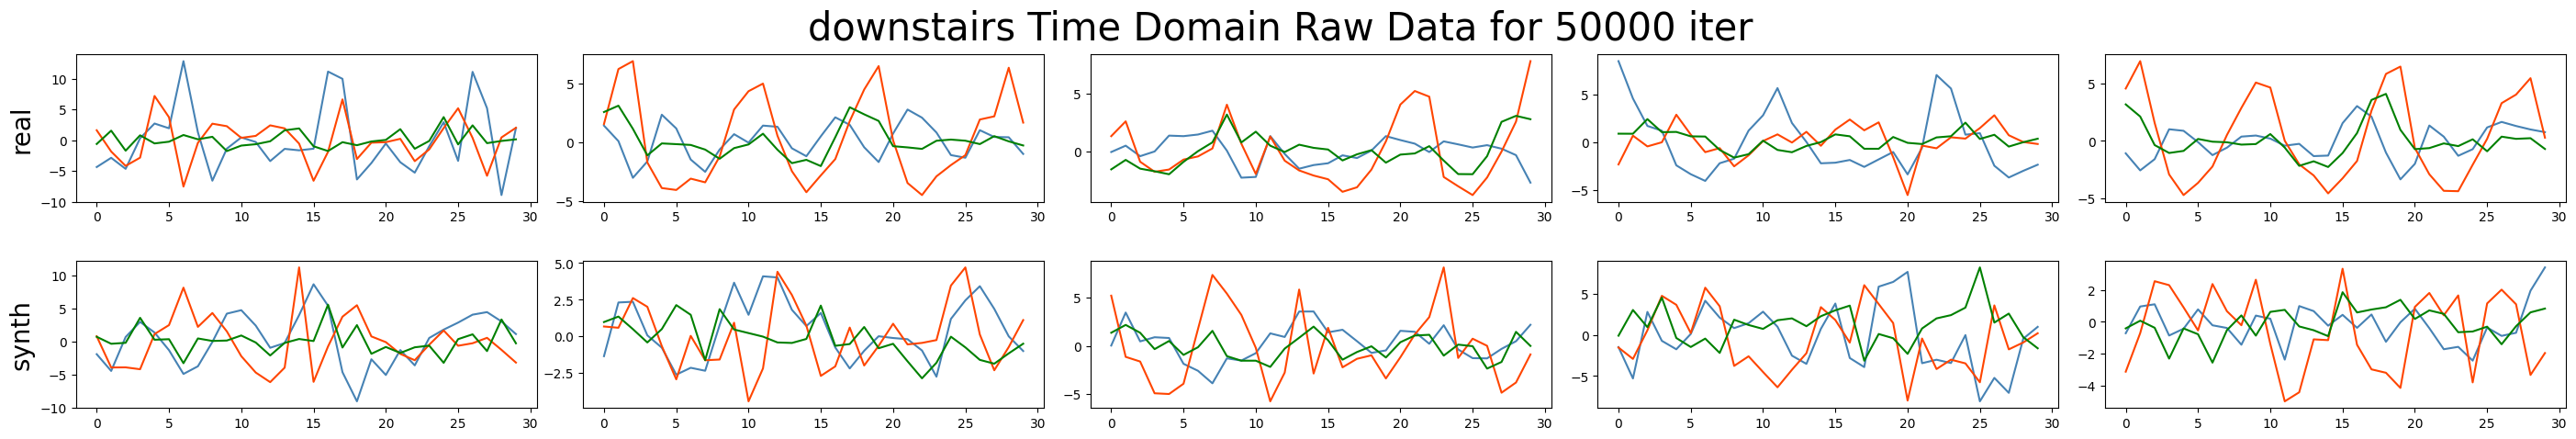

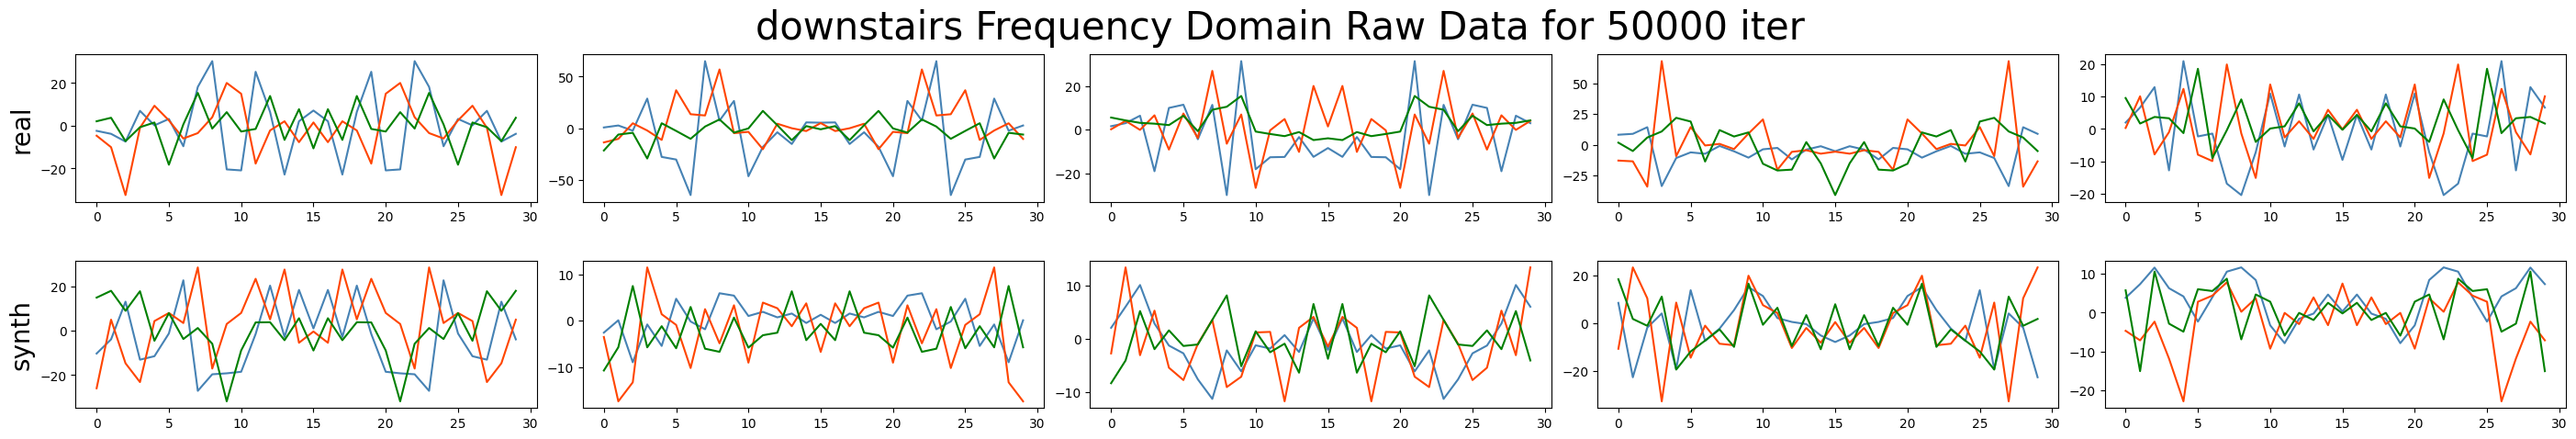

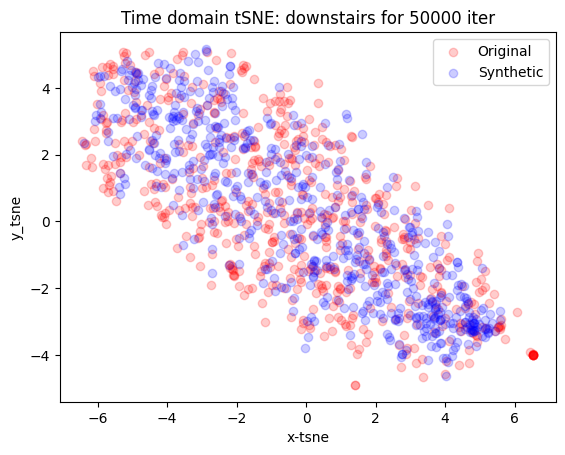

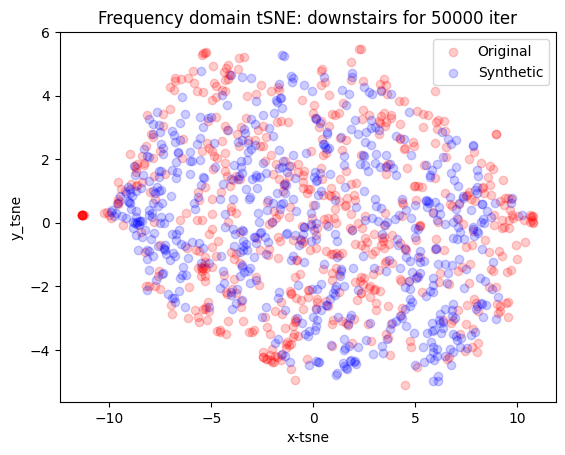

In [52]:
results = {}
synthetic = []
original = []
for i in range(len(class_names)):
    eval = DagharUniclassEvaluation(data_path=data_path,
                                    models_path= models_path + directorys[i] + '/Model/',
                                    class_name=class_names[i],
                                    seq_len=30,
                                    show=True,
                                    iter = 50000)
    print('-----------------------------------------------------------------------------')
    results[first_parts[i]] = (eval.dictionary)
    synthetic.append(eval.syn_data)
    original.append(eval.original_data)


print(results)
print(len(original))

In [53]:
import pandas as pd

# Convertendo o dicionário de dicionários em um DataFrame
df = pd.DataFrame(results).T  # Transposta para ter as chaves como índice

# Separando as colunas de atividade e iteração
df['Activity'] = df.index.str.split('_').str[0]  # Primeira parte da string antes do primeiro underline
df['Iterations'] = df.index.str.split('_').str[1]  # Segunda parte (número de iterações)

# Reorganizando as colunas
df = df[['Activity', 'Iterations', 'Time', 'Frequency']].reset_index(drop=True)

# Exibir o DataFrame resultante
df


Activity Iterations               Time          Frequency
0    upstairs      50000  0.99921 ± 0.00018  0.76855 ± 0.00301
1         sit      50000  0.99300 ± 0.00182  0.98550 ± 0.00164
2       stand      50000  0.99709 ± 0.00107  0.98483 ± 0.00072
3         run      50000  0.99863 ± 0.00041  0.78550 ± 0.00300
4        walk      50000  0.99888 ± 0.00039  0.78632 ± 0.00532
5  downstairs      50000  0.99871 ± 0.00023  0.79860 ± 0.00303

In [6]:
def extract_dataloader(dataloader):
    data = []
    for i, (real_sig, label) in enumerate(dataloader):
        real_sig = real_sig.cpu().detach().numpy()
        sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
        data.append(sig)

    return np.array(data)

'''#save 600 synthetic data
for directory in directorys:
    syn_set = Single_Class_Synthetic_Dataset(path = models_path + directory + '/checkpoint', seq_len=30, sample_size=600)
    syn_data_loader = data.DataLoader(syn_set, batch_size=1, num_workers=1, shuffle=False)
    syn_data = extract_dataloader(syn_data_loader)
    print(syn_data.shape)
    np.save("/workspaces/container-workspace/tts-gan/Notebooks/Daghar_data/" + directory, arr = syn_data)
    
'''

'#save 600 synthetic data\nfor directory in directorys:\n    syn_set = Single_Class_Synthetic_Dataset(path = models_path + directory + \'/checkpoint\', seq_len=30, sample_size=600)\n    syn_data_loader = data.DataLoader(syn_set, batch_size=1, num_workers=1, shuffle=False)\n    syn_data = extract_dataloader(syn_data_loader)\n    print(syn_data.shape)\n    np.save("/workspaces/container-workspace/tts-gan/Notebooks/Daghar_data/" + directory, arr = syn_data)\n    \n'

## Encoder

In [40]:
from LoadRealRunningJumping import *
from LoadSyntheticRunningJumping import *
from GANModels import *

original_set = daghar_load_dataset(class_name='run', path='../DAGHAR_GANs/')
syn_set = Single_Class_Synthetic_Dataset(path = self.models_path + 'checkpoint',
                                         seq_len=seq_len)

running_model = Discriminator(seq_len=30, in_channels=3)
running_ckp = torch.load('../pre-trained-models/daghar_50000_30_100/run_50000_D_30_2024_10_18_01_39_30/Model/checkpoint', map_location=torch.device("cpu"))
running_model.load_state_dict(running_ckp['dis_state_dict'])

return single class data and labels, class is run
data shape is (16260, 3, 1, 30)
label shape is (16260,)


/tmp/ipykernel_534465/3081850358.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load('../pre-trained-models/daghar_50000_30_100/run_50000_D_30_2024

<All keys matched successfully>

In [41]:
running_model

Discriminator(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=1, s2=15)
      (1): Linear(in_features=45, out_features=50, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=50, out_features=50, bias=True)
            (queries): Linear(in_features=50, out_features=50, bias=True)
            (values): Linear(in_features=50, out_features=50, bias=True)
            (att_drop): Dropout(p=0.5, inplace=False)
            (projection): Linear(in_features=50, out_features=50, bias=True)
          )
          (2): Dropout(p=0.5, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1)

In [42]:
running_model(torch.tensor(original_set[0:10][0], dtype=torch.float))

tensor([[0.5004],
        [0.7168],
        [0.8186],
        [0.8480],
        [0.6602],
        [0.7924],
        [0.5605],
        [0.5729],
        [0.5709],
        [0.7257]], grad_fn=<AddmmBackward0>)

In [ ]:
running_ckp['dis_state_dict'].keys()

In [43]:
keys_to_remove = list(running_ckp['dis_state_dict'].keys())[-4:]  # Obtém as últimas 4 chaves

# Remove as chaves do dicionário original
for key in keys_to_remove:
    del running_ckp['dis_state_dict'][key]

# Verificando o resultado
print(running_ckp['dis_state_dict'].keys())

odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weight', '1.2.0.fn.1

In [44]:
class Encoder(nn.Sequential):
    def __init__(self, 
                 in_channels=3,
                 patch_size=15,
                 emb_size=50, 
                 seq_len = 150,
                 depth=3, 
                 n_classes=1, 
                 **kwargs):
        super().__init__(
            PatchEmbedding_Linear(in_channels, patch_size, emb_size, seq_len),
            Dis_TransformerEncoder(depth, emb_size=emb_size, drop_p=0.5, forward_drop_p=0.5, **kwargs)
        )

In [45]:
encoder = Encoder(in_channels=3, seq_len=30)
encoder

Encoder(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=1, s2=15)
      (1): Linear(in_features=45, out_features=50, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=50, out_features=50, bias=True)
            (queries): Linear(in_features=50, out_features=50, bias=True)
            (values): Linear(in_features=50, out_features=50, bias=True)
            (att_drop): Dropout(p=0.5, inplace=False)
            (projection): Linear(in_features=50, out_features=50, bias=True)
          )
          (2): Dropout(p=0.5, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): Feed

In [47]:
encoder.load_state_dict(running_ckp['dis_state_dict'])
encoder

Encoder(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=1, s2=15)
      (1): Linear(in_features=45, out_features=50, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=50, out_features=50, bias=True)
            (queries): Linear(in_features=50, out_features=50, bias=True)
            (values): Linear(in_features=50, out_features=50, bias=True)
            (att_drop): Dropout(p=0.5, inplace=False)
            (projection): Linear(in_features=50, out_features=50, bias=True)
          )
          (2): Dropout(p=0.5, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): Feed

In [50]:
encoder(torch.tensor(original_set[0:11][0], dtype=torch.float)).shape

torch.Size([11, 3, 50])